In [53]:
#import library for reading and manipulation of data
import pandas as pd
import numpy as np
#import library for visualization
import seaborn as sns
import matplotlib.pyplot as plt
#import library to split data
from sklearn.model_selection import train_test_split
#import library for preprocessing
from sklearn.preprocessing import LabelBinarizer
#to import keras and tensorflow
import keras
import tensorflow as tf

In [54]:
pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
#Load the label
labels = pd.read_csv("/content/drive/MyDrive/AILEAD TECH CLASSES/assignment/Labels-1.csv")
labels.shape
labels

,Label
0,nilgiri_langur
1,nilgiri_langur
2,nilgiri_langur
3,nilgiri_langur
4,nilgiri_langur
...,...
1337,bald_uakari
1338,bald_uakari
1339,bald_uakari
1340,bald_uakari


In [57]:
#Load the image
images= np.load('/content/drive/MyDrive/AILEAD TECH CLASSES/assignment/images-1.npy')
images.shape

(1342, 128, 128, 3)

It was observed that the data is stored in a 4-dimensional NumPy array. The first dimension 1342 indicates the number of images, and each image is stacked on top of the other as a 3-dimensional NumPy array. The second dimension 128 indicates that the number of pixels along the x-axis, The third dimension 128 indicates that the number of pixels along the y-axis and the fourth dimension 3 is the total number of channels in those images i.e. these are colored images consisting of RGB (Red, Green, and Blue) channels.

Split the data

In [58]:
#split the variables into train and test
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=0)
images_train.shape

(1073, 128, 128, 3)

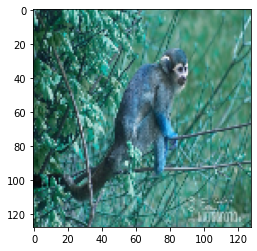

In [59]:
#Visualize images
plt.imshow(images_train[0])
plt.show()

In [60]:
#Normalize images
images_train= images_train.astype('float32')/255.0
images_test= images_test.astype('float32')/255.0
images_train.shape

(1073, 128, 128, 3)

In [61]:
labels_train.dtypes

Label    object
dtype: object

In [62]:
#Encode the label to help get the classes in the Label
enc= LabelBinarizer()
labels_train_encoded=enc.fit_transform(labels_train)
labels_test_encoded=enc.fit_transform(labels_test)
#visualize the train shape
labels_train_encoded.shape

(1073, 10)

In [63]:
labels_test_encoded=enc.fit_transform(labels_test)
#visualize the test shape
labels_test_encoded.shape

(269, 10)

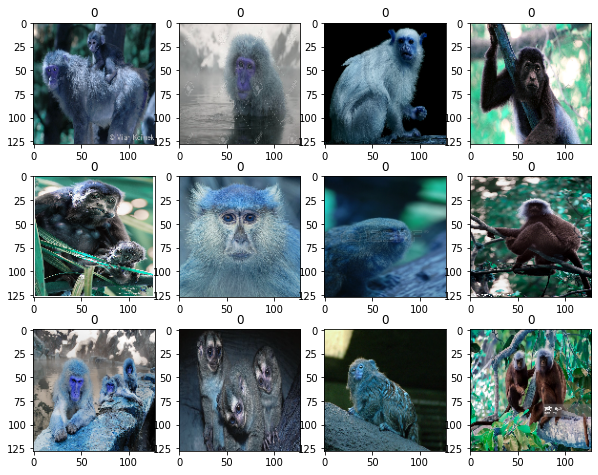

In [64]:
# To visualize the classes in the label
rows = 3
cols = 4
fig = plt.figure(figsize=(10, 8))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(labels_train_encoded))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(images_train[random_index, :])
        ax.set_title(labels_train_encoded[random_index, 0])

In [65]:
#set seed for reproducibility
np.random.seed(2)
import random
random.seed(2)
tf.random.set_seed(2)

In [66]:
#import keras sequential model
from tensorflow.keras.models import Sequential
#import all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam

In [67]:
#initializing a sequential model
model1= Sequential()
# First layer
#Adding the first conv layer with a 64filter and kernel size of (3X3), padding='same' provide the outputsize as same as input size
#input_shape implies input image dimension of the dataset
model1.add(Conv2D(64,(3,3), padding='same', activation='relu', input_shape=(128,128,3)))
#adding the maxpooling to reduce the size of the first conv layer and also normalize the data
model1.add(MaxPooling2D())
model1.add(BatchNormalization())
# Second layer will be repetition of the first layer with reduced filter from 64 to 32
model1.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model1.add(MaxPooling2D())
model1.add(BatchNormalization())
# Third Layer will be the repetition of the second layer
model1.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model1.add(MaxPooling2D())
model1.add(BatchNormalization())
# Flattening the output after max pooling to make it ready for dense creation
model1.add(Flatten())
# Adding fully connected layer with 128 neurons
model1.add(Dense(128, activation='relu'))
# Adding the output layer with 10 neurons and the activation function is softmax
model1.add(Dense(10, activation='softmax'))

In [68]:
#Build the compiler using Adam optimizer 
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [69]:
#View the model summary
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                      

In [70]:
#Build the model
history1=model1.fit(images_train, labels_train_encoded, batch_size=64, epochs=10, validation_split=0.3)

Epoch 1/10
12/12 [==============================] - 35s 3s/step - loss: 2.4563 - accuracy: 0.3302 - val_loss: 2.2212 - val_accuracy: 0.1925
Epoch 2/10
12/12 [==============================] - 21s 2s/step - loss: 0.6089 - accuracy: 0.7963 - val_loss: 2.3722 - val_accuracy: 0.1056
Epoch 3/10
12/12 [==============================] - 23s 2s/step - loss: 0.1566 - accuracy: 0.9401 - val_loss: 2.9130 - val_accuracy: 0.1056
Epoch 4/10
12/12 [==============================] - 21s 2s/step - loss: 0.0474 - accuracy: 0.9907 - val_loss: 3.7193 - val_accuracy: 0.1087
Epoch 5/10
12/12 [==============================] - 21s 2s/step - loss: 0.0128 - accuracy: 0.9987 - val_loss: 4.3239 - val_accuracy: 0.1118
Epoch 6/10
12/12 [==============================] - 22s 2s/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 4.5367 - val_accuracy: 0.1366
Epoch 7/10
12/12 [==============================] - 21s 2s/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 4.9612 - val_accuracy: 0.1522
Epoch 8/10
12/12 [==

The Model1 is overfitting this may be due to the number of data available to curb this overfitting we will need more data.

In [71]:
model1.evaluate(images_test, labels_test_encoded)

9/9 [==============================] - 2s 175ms/step - loss: 6.1561 - accuracy: 0.1673


[6.156116962432861, 0.1672862470149994]

The model overfit. The train data gets to 1 and the test data is 0.1301. More data may be required more data.

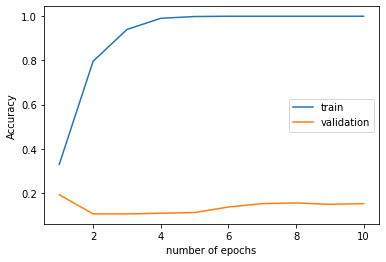

In [72]:
#viaualize the model performance
acc= history1.history['accuracy']
val_acc= history1.history['val_accuracy']
epochs=range(1,len(acc)+1)

plt.plot(epochs, acc, label='train')
plt.plot(epochs, val_acc, label='validation')
plt.legend()
plt.xlabel('number of epochs')
plt.ylabel('Accuracy')
plt.show()

In [73]:
#clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [74]:
#set seed for reproducibility
np.random.seed(2)
import random
random.seed(2)
tf.random.set_seed(2)

In [75]:
 #initializing a sequential model
model2= Sequential()
#Adding the first conv layer with a 64filter and kernel size of (3X3), padding='same' provide the outputsize as same as input size
#input_shape implies input image dimension of the dataset
model2.add(Conv2D(64,(3,3), padding='same', activation='relu', input_shape=(128,128,3)))
#adding the maxpooling to reduce the size of the first conv layer and also normalize the data
model2.add(MaxPooling2D())
model2.add(BatchNormalization())
# Second layer will be repetition of the first layer with reduced filter from 64 to 32
model2.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D())
model2.add(BatchNormalization())
# Third Layer will be the repetition of the second layer
model2.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D())
model2.add(BatchNormalization())
# Flattening the output after max pooling to make it ready for dense creation
model2.add(Flatten())
#Adding fully connected layer with 32 neurons
model2.add(Dense(32, activation='relu'))
#Adding drop out of 20%
model2.add(Dropout(0.2))
#Adding fully connected layer with 32 neurons
model2.add(Dense(32, activation='relu'))
#Adding drop out of 20%
model2.add(Dropout(0.2))
# Adding the output layer with 10 neurons and the activation function is softmax
model2.add(Dense(10, activation='softmax'))

In [76]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [77]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                        

In [ ]:
history2=model2.fit(images_train, labels_train_encoded, batch_size=64, epochs=10, validation_split=0.3)

Epoch 1/10
12/12 [==============================] - 24s 2s/step - loss: 2.5417 - accuracy: 0.1771 - val_loss: 2.2876 - val_accuracy: 0.1553
Epoch 2/10
12/12 [==============================] - 21s 2s/step - loss: 2.0475 - accuracy: 0.2836 - val_loss: 2.3091 - val_accuracy: 0.1180
Epoch 3/10
12/12 [==============================] - 21s 2s/step - loss: 1.7971 - accuracy: 0.3675 - val_loss: 2.3385 - val_accuracy: 0.1118
Epoch 4/10
 6/12 [==============>...............] - ETA: 9s - loss: 1.5790 - accuracy: 0.4453 

The Model2 is undefitting.

In [ ]:
model2.evaluate(images_test, labels_test_encoded)

In [ ]:
acc= history2.history['accuracy']
val_acc= history2.history['val_accuracy']
epochs=range(1,len(acc)+1)

plt.plot(epochs, acc, label='train')
plt.plot(epochs, val_acc, label='validation')
plt.legend()
plt.xlabel('number of epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
#set seed for reproducibility
np.random.seed(2)
import random
random.seed(2)
tf.random.set_seed(2)

In [ ]:
 #initializing a sequential model
model3= Sequential()
#Adding the first conv layer with a 128 filter and kernel size of (3X3), padding='same' provide the outputsize as same as input size
#input_shape implies input image dimension of the dataset
model3.add(Conv2D(128,(3,3), padding='same', activation='relu', input_shape=(128,128,3)))
#adding the maxpooling to reduce the size of the first conv layer and also normalize the data
model3.add(MaxPooling2D())
model3.add(BatchNormalization())
# Second layer will be repetition of the first layer with reduced filter from 128 to 64
model3.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model3.add(MaxPooling2D())
model3.add(BatchNormalization())
# Flattening the output after max pooling to make it ready for dense creation
model3.add(Flatten())
#Adding fully connected layer with 64 neurons
model3.add(Dense(64, activation='relu'))
#Adding drop out of 25%
model3.add(Dropout(0.25))
#Adding fully connected layer with 64 neurons
model3.add(Dense(64, activation='relu'))
#Adding drop out of 25%
model3.add(Dropout(0.25))
# Adding the output layer with 10 neurons and the activation function is softmax
model3.add(Dense(10, activation='softmax'))

In [ ]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
model3.summary

The summary is not populating

In [ ]:
history3=model3.fit(images_train, labels_train_encoded, batch_size=64, epochs=10, validation_split=0.3)

In [ ]:
model3.evaluate(images_test, labels_test_encoded)

The model underfits

In [ ]:
acc= history3.history['accuracy']
val_acc= history3.history['val_accuracy']
epochs=range(1,len(acc)+1)

plt.plot(epochs, acc, label='train')
plt.plot(epochs, val_acc, label='validation')
plt.legend()
plt.xlabel('number of epochs')
plt.ylabel('Accuracy')
plt.show()

Despite rebuilding the model three times the models didnt generalize well in all the three cases. I will suggest that more data may be required.